In [1]:
using Controlz # this *might* take a few min to compile
using PyPlot # for plotting via matplotlib

# (optional) grand budapest hotel theme
PyPlot.matplotlib.style.use("https://raw.githubusercontent.com/cako/mpl_grandbudapest/master/grandbudapest.mplstyle")

# drug partitioning between blood stream and GI tract

(continuing from the written portion of the studio...)

(1) Use the following parameters:
* $\alpha=1/6$ hr$^{-1}$
* $\beta = 1/4$ hr$^{-1}$
* $V_b=V_g=1$ L

Define them as variables below. Use Julia's unicode capability!

In [2]:
α = 1/6 #units in 1/hr
β = 1/4 #units in 1/hr
V_b = V_g = 1 #units in L not sure why the unicode does not work T_T

1

(2) use `Controlz.jl` to contruct the transfer function from part (a) that relates changes in (input) $I$ to changes in (output) $G$. 

an informative variable name might be `G_ig`.

<img src="https://devhumor.com/content/uploads/images/May2018/meaningful_variable_name.jpg" width=250></img>

In [4]:
G_ig = 1 / (V_g * (s + β)) # G*(s)/I*(s) first process transfer function


    1.0
------------
1.0*s + 0.25

(3) now contruct the transfer function from part (b) that relates changes in (input) $G$ to changes in (output) $B$.

In [5]:
G_gb = (β * V_g) / (V_b * (s + α)) # B*(s)/G*(s) second process transfer function


           0.25
---------------------------
1.0*s + 0.16666666666666666

(4) contruct the "composite"/"overall" transfer function from part (d) that relates changes in (input) $I$ to changes in (output) $B$.

In [6]:
G_c = β / (V_b * (s+β) * (s+α)) # B*(s) output overall transfer function


                         0.25
------------------------------------------------------
1.0*s^2 + 0.41666666666666663*s + 0.041666666666666664

(5) the transfer function from (4) should be the product of the two transfer functions from part (2) and (3), right? compute the product of these transfer functions in `Controlz.jl`. yes, `Controlz.jl` can multiply transfer functions for you! see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#transfer-function-algebra-1). are they the same indeed?

In [7]:
g_prod = G_gb * G_ig #does Controlz.jl work


                         0.25
------------------------------------------------------
1.0*s^2 + 0.41666666666666663*s + 0.041666666666666664

instead of looking at the numbers, to compare by eye, you can let `Controlz.jl` compare the transfer functions form you using `g1 == g2` or `isapprox(g1, g2)`.

In [8]:
G_c == g_prod #second to be equal, define for transfer function yes or no

true

(6) visualize the poles of the second order "overall" transfer function $B(s)/I(s)$ using `viz_poles_and_zeros`. are the poles real? do the poles have imaginary parts? are the real parts of the poles negative? etc.

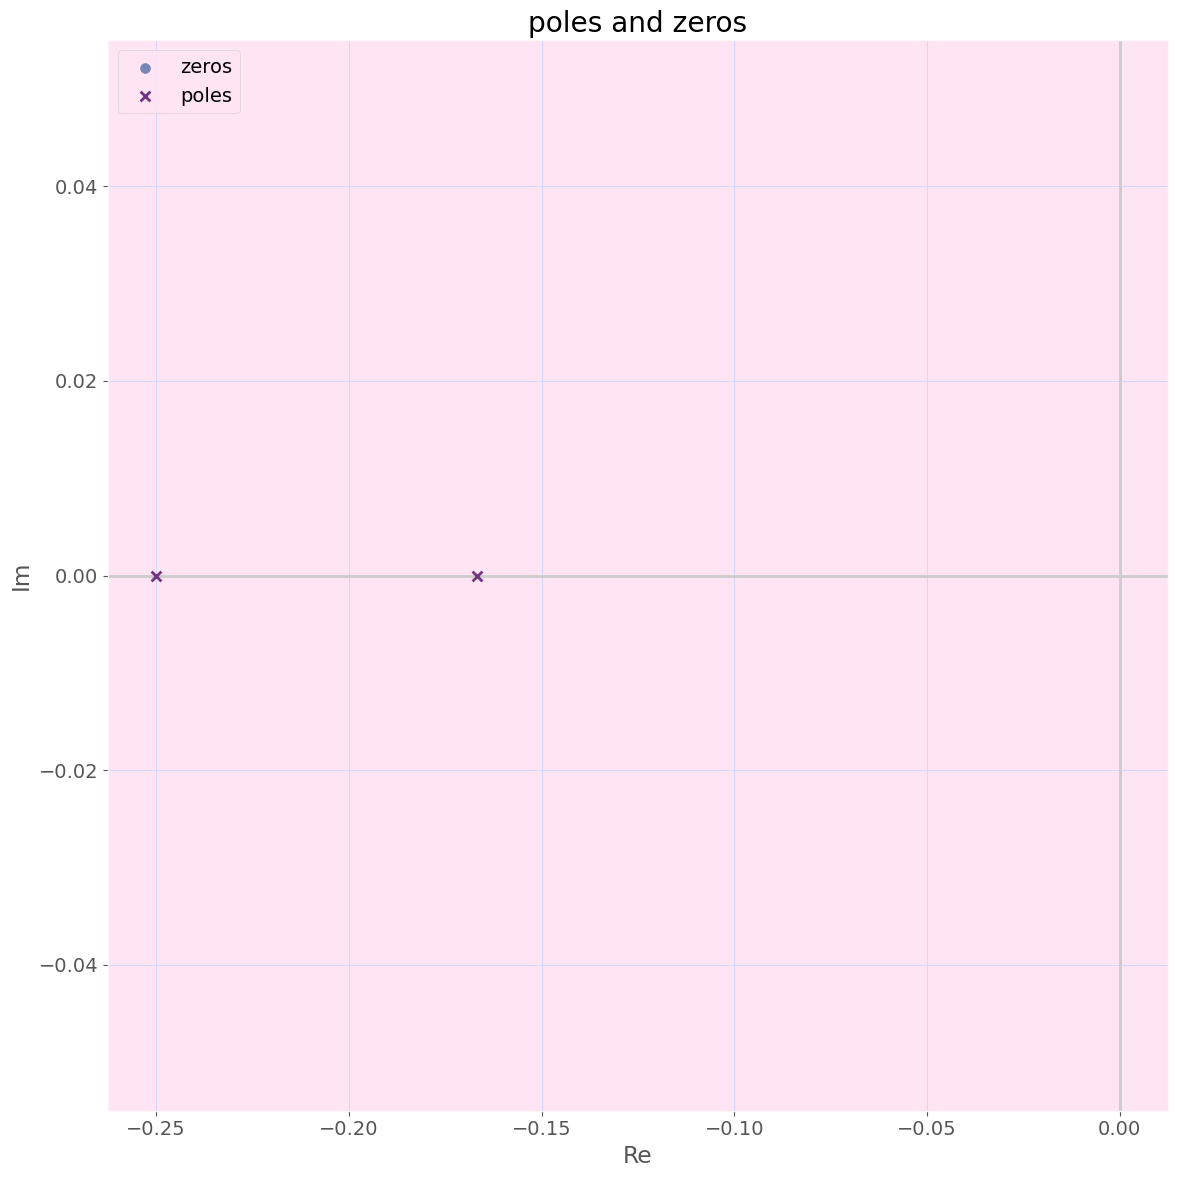

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [9]:
viz_poles_and_zeros(G_c)

(7) swallowing a pill of $A$ mg at $t=0$ can be modeled as an impulse input $i(t)=A \delta(t)$, with $\delta(t)$ the Dirac delta function. in `Controlz.jl`, simulate the response $b(t)$ to this pill-swallowing input if $A=3$ mg. simulate for $t=36$ hours. use `ylabel("blah")` and `xlabel("blah")` after `viz_response` to overwrite the y- and x-labels with appropriate labels that indicate units.

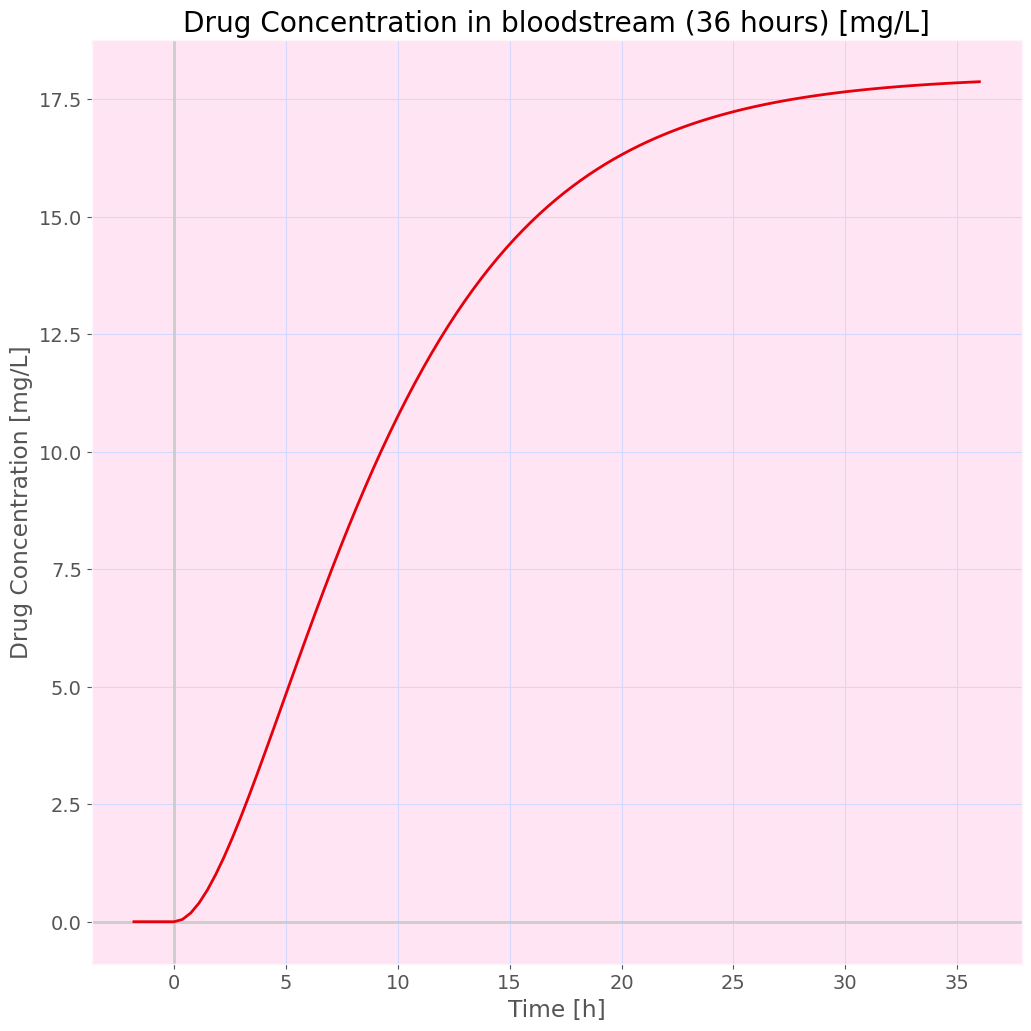

PyObject Text(0.5, 1.0, 'Drug Concentration in bloodstream (36 hours) [mg/L]')

In [12]:
A = 3 #units in mg, concentration of A
t = 36 #units of h, time of 36 hours

U = A / s 
Y = G_c * U

data = simulate(Y, 36.0)
viz_response(data)

xlabel("Time [h]")
ylabel("Drug Concentration [mg/L]")
title("Drug Concentration in bloodstream (36 hours) [mg/L]")

(7b) what is the peak concentration of the drug in the blood stream? do not eyeball the figure; rather use Julia. hint: there is a `maximum` function.

In [13]:
c = data[:,:output]
maximum(c)

17.870584845970274

(7c) when (at what time $t$) does the peak blood concentration occur? again, use code to answer this question. the `argmax` function might be helpful. (see [docs](https://docs.julialang.org/en/v1/base/collections/#Base.argmax))

In [ ]:
max_t = argmax(c)

(7d) the drug is not effective if its concentration in the blood is less than 0.6 mg/L.

(i) how many hours does it take for the drug to be effective?

(ii) how many hours after the first pill is swallowed does the effectiveness of the drug wear off (assuming no more pills are taken)?

this is a programming exercise; do not eyeball the figure to get the answer...

options for an approach:
* the traditional way. write a `for` loop and print something within the for loop under certain conditions.
* the Julia way. use `findfirst`, `findlast`, and array comparison.

In [14]:
effc = 0.6
findfirst( x -> x > effc,c)

7

In [15]:
findlast(x -> x > effc,c)

100

(7e) redraw the impulse response and put as a horizontal, dashed line the effective concentration. Google "matplotlib axhline" to see how to do this. does your answer look reasonable?

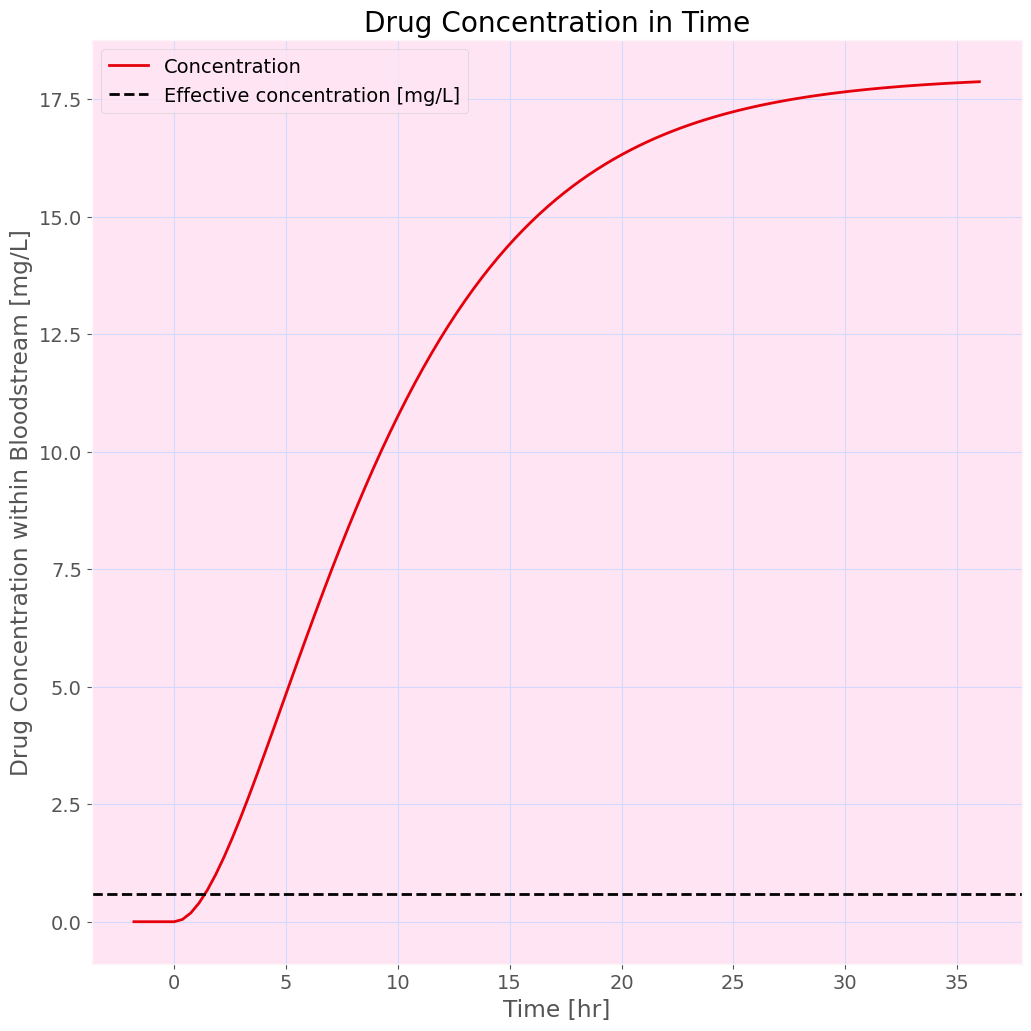

PyObject <matplotlib.legend.Legend object at 0x0000000001D49760>

In [16]:
time = data[:,:t]

plot(time, c, label = "Concentration")
xlabel("Time [hr]")
ylabel("Drug Concentration within Bloodstream [mg/L]")
title("Drug Concentration in Time")

axhline(y=effc, color="black", linestyle="--", label="Effective concentration [mg/L]")
legend()